# Diffusion weighted MRI: a picture of water molecules random walk

### Authors: Per Magnus Norang, Jorge Hernandez og Benjamin Trønnes

In this project we'll be working with brownian motion, or random walk. Brownian motion describes the random motion of particles in a medium. This kind of motion is connected with the concept difusion in which particles in an area with high concentration move to an area with lower concentration. These concepts are important parts of magnetic resonance imaging or MRI, an important procedure that allows us to measure the concentration of water molecules in an area of the body. For when the body eventually develops a tumor it will start to divide uncrontollably creating an area with more cells per area and thus a lower diffusion constant. Using MRI we can create images of the density of water molecules within an area. Using such an image it's possible to discern where the tumors are.

Our task is to develop a code that simulates the random walk of particles that emulate water molecules that will move both in an area tumors and in an area without tumors. Using these simulations we aim to detect tumors in tissue in a similar way that MRI does.

We need to set certain ground conditions and assumptions. One of these is wether or not the particles movement can be considered isotropic (meaning that the particles have the same probability of going in any directions) or wether they're nonisotropic (meaning they have a higher probability of going in one direction rather than the others). We will be assuming isotropic movement throughout the report unless stated otherwise. 

Another thing we need to decide is wether we assume that particles can overlap in our simulations or not. In order to simplify coding and since the size of particles is so small compared to the size particle steps we assume that the effect of particle stacking is negligible so we assume they can overlap in our simulations.

As a core mechanic of brownian motion is that particles never stand still as they always have some kinetic energy unless the temperature is approching absolute zero we assume that particles never stand still and always move in one direction or another.

## Excercise 1


## Exercise 1a

If we have a normaly distributed probablitiy function $\varphi$ it will be in the form
$\varphi(x) = \frac{1}{\sigma \sqrt{2\pi}}\exp{\frac{-(x-\mu)^2}{2\sigma^2}} $ like all other normal-distributed probability density functions.

Assuming an expected value of zero and a variance of $\sigma^2 = at$ we get
$\varphi(x,t) = \frac{1}{\sqrt{2\pi at}}\exp{\frac{-x^2}{2at}} $

If we now look at equation 5 in the project which states

$\frac{\delta \varphi(x,t)}{\delta t} = D\frac{\delta^2\varphi(x,t)}{\delta x^2}$   where $D = \frac{(\Delta x)^2}{2\Delta t}$

Derivating the function $\varphi$ twice with respect to $x$ we get

$\frac{\delta^2\varphi(x,t)}{\delta x^2} = \frac{(x^2-at)}{\sqrt{2\pi}(at)^{5/2}}\exp{\frac{-x^2}{2at}}$

and derived with respect to $t$ we get

$\frac{\delta\varphi(x,t)}{\delta t} = \frac{a(x^2-at)}{2\sqrt{2\pi}(at)^{5/2}}\exp{\frac{-x^2}{2at}}$

When we have the values $\Delta x =\Delta t = 1$ we have

$\frac{a(x^2-at)}{2\sqrt{2\pi}(at)^{5/2}}\exp{\frac{-x^2}{2at}} = \frac{1}{2} \frac{(x^2-at)}{\sqrt{2\pi}(at)^{5/2}}\exp{\frac{-x^2}{2at}}$

Simplifying this equation we end up with the suprisingly easy equation

$\frac{a}{2} = \frac{1}{2} $ 

Which gives us the final value $a = 1$ and thus $\sigma^2 = t$

## Exercise 1b

In [6]:
#Importing neccesary libraries
import numpy as np
import matplotlib.pyplot as plt
import random
import timeit
import scipy.optimize
import matplotlib as mpl
from matplotlib.image import NonUniformImage
from matplotlib.colors import BoundaryNorm
from matplotlib.colors import Normalize
from matplotlib.ticker import MaxNLocator
import math
from math import sqrt
Length_unit = "mm"
Time_unit = "s"


In this exercise we'll be creating an algorithm for a sipmle random walk in one dimension. In the cell below such an algorithm is implemented

In [87]:
#singular Random walk. I am assuming for the moment isotropic random walk. If not, change p_r

#Arrays for time steps and positions at time "t"



#Random number
random = np.random.uniform(0,1)
pr = 0.5




def Simple_Random_Walk_1D(M, pr):
    array_time_step =[]
    array_position = []
    delta_x = 1
    #time variable, i.e. clock
    t = 0
    # initial position of the particle
    x = 0
    while t < M:
        #increase time until we reach M
        t+= 1
        random = np.random.uniform(0,1)
        if random < pr:
            x = x + delta_x
        else:
            x = x - delta_x
        array_position.append(x)
        array_time_step.append(t)
    return array_position, array_time_step


In [88]:
#call Simple_Random_Walk_1D
a = Simple_Random_Walk_1D(1000, 0.5)
#print(a)
#print(a[0])

Text(0.5, 0, 'Time step [s]')

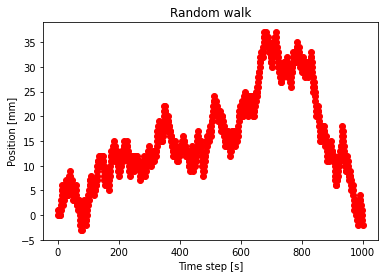

In [89]:
plt.figure(1)
plt.plot(a[1], a[0], 'ro')
plt.title("Random walk")
plt.ylabel(f'Position [{Length_unit}]')
plt.xlabel(f'Time step [{Time_unit}]')

## Exercise 1c

Text(0.5, 0, 'Time step [s]')

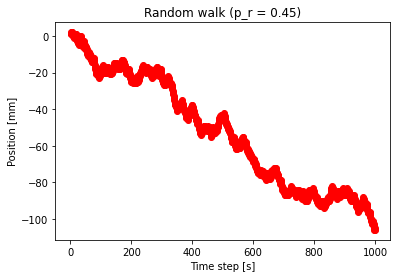

In [90]:
b = Simple_Random_Walk_1D(1000, 0.45)
plt.figure(1)
plt.plot(b[1], b[0], 'ro')
plt.title("Random walk (p_r = 0.45)")
plt.ylabel(f'Position [{Length_unit}]')
plt.xlabel(f'Time step [{Time_unit}]')

Text(0.5, 0, 'Time step [s]')

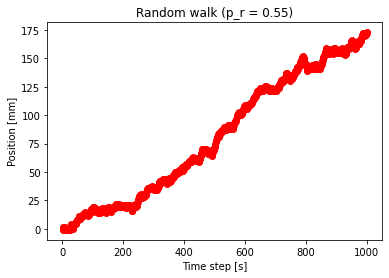

In [91]:
b = Simple_Random_Walk_1D(1000, 0.55)
plt.figure(1)
plt.plot(b[1], b[0], 'ro')
plt.title("Random walk (p_r = 0.55)")
plt.ylabel(f'Position [{Length_unit}]')
plt.xlabel(f'Time step [{Time_unit}]')


The three graphs above clearly indicate that the trajectory of the particles are affected by the different values of pr. The first graph shows an isotropic movement: the probability that the particle moves in one direction is the same as the probability of moving to the other direction. While the other two graphs decribe a more non isotropic movement: the particle is more likely to move in one direction than the other: this could be for example, the case of a particle subject to a potential (or force).

## Excercise 1d


In this exercise we attempt to simulate random walk for multiple particles at the same time. The implementation of this simlation is impleneted in the cell below.

Text(0.5, 0, 'Time step [s]')

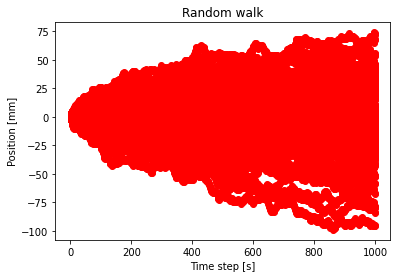

In [75]:

N = 100
M = 100

#Defines the function that calculate random walk in 1d
def Multiple_Random_Walk_1D(M, N, pr):
    pos5 = []
    time_step_array = np.linspace(1,M,M)

    #Runs 
    for i in range(N): #Runs N times to create N lists
        x = 0
        temp_list = [] #Creates a temporary list to be inserted into the final list
        for j in range(M): #Runs M times to create M movements
                #Discern wether the particle moves left or right
                random = np.random.uniform(0,1)
                if random < p_r:
                    x = x + 1
                else:
                    x = x - 1
                temp_list.append(x) #Inserts the new position into the temporary list
        pos5.append(temp_list) #Inserts the temporary list into the final positions list
    #Returns the final positions array with N lists that are M moves long, and the list of time steps
    pos5 = np.transpose(pos5)
    return pos5, time_step_array 
v = Multiple_Random_Walk_1D(1000, 100, 0.5) #Runs the code for N particles, M steps, and isotropic movement

#%timeit -n 100 Multiple_Random_Walk_1D(1000,100,0.5) #Left as comment as it increases runtime (speed about 361 ms)

#Previously used test codes
#print(np.size(v[0]))
#print(v[0])
#matrix = np.array(pos5)
#print(matrix)
#print(v[1])

plt.plot(v[1], v[0], 'ro')
plt.title("Random walk")
plt.ylabel(f'Position [{Length_unit}]')
plt.xlabel(f'Time step [{Time_unit}]')

## Exercise 1e

In this exercise we explore ways to increment the codes efficiency or runtime and we explain why it may or may not run faster. 

1.55 ms ± 149 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Text(0.5, 0, 'Time step [s]')

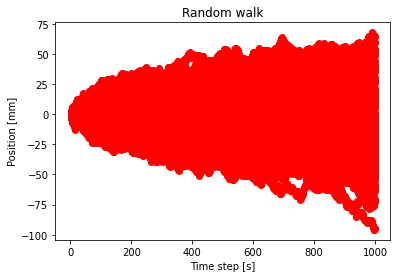

In [76]:

#Defines an optimized function that calculates random walk in 1d
def Multiple_Random_Walk_1D_optimized(M, N, pr):
    time_step_array = np.linspace(1,M,M)
    rand_matrix = np.random.rand(N,M) #Creates an array containing pseudo-random values between 0 and 1  
    rand_matrix = np.where(rand_matrix < pr, 1,-1) #Any value below the pr-value is exhcanged with 1 and the rest becomes -1
    rand_matrix = np.cumsum(rand_matrix, axis=1)  #The cumulative sum of the arrays are calculated
    pos5 = np.transpose(rand_matrix)  #The transpose of the matrix is found to create a better plot
    return pos5, time_step_array 

e = Multiple_Random_Walk_1D_optimized(1000, 100, 0.5) #Runs the code for N particles, M steps, and isotropic movement

%timeit Multiple_Random_Walk_1D_optimized(1000,100,0.5)

#Plots the movement into a graph
plt.plot(e[1], e[0], 'ro')
plt.title("Random walk")
plt.ylabel(f'Position [{Length_unit}]')
plt.xlabel(f'Time step [{Time_unit}]')

In order to increase efficency, we replaced the for loops in the last exercise with the function np.where. For high values of time steps (M) and number of particles (N) np.where takes less time as it works on the whole matrix at once instead of doing it piece by piece thus being more effective than a for loop. And using np.random.rand allows us to create an entire matrix of pseudo-random values in one step instead of throughout a for loop. The np.cumsum function also let's us avoid the for loops as it calculates the cumulative sums throughout the matrix on it's own. The code in 1d used about 361 ms for M = 1000 and N = 100, whilst the same numbers in the improved code only took 1.56 ms.

## Exercise 1f

In this exercise we make a simulation with M, N and pr, and plot the empirical variance as a function of time. The idea is compare with the analytical value from exercise 1a

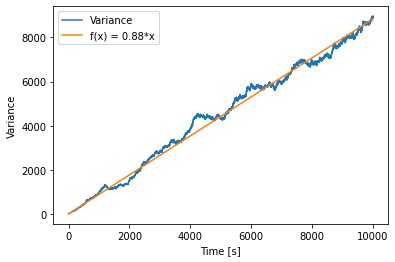

In [111]:

M = 1000
N = 100

def varianceCalculate(M,N):
    #We create lists and the walk_array
    dynamicVariance = []
    length = np.linspace(1,M,M)
    walk = Multiple_Random_Walk_1D_optimized(M,N,0.5)
    #We run through all the positions for each M to find the variance of the positions
    for i in range(0,M):
        temp_list = []
        #The positions in timestep i is appended to the temporary list
        for j in range(0,N):
            temp_list.append(walk[0][i][j]) 
        #We find the variance of the positions and append them to the final list
        dynamicVariance.append(np.var(temp_list))

    return dynamicVariance, length, walk

answer = varianceCalculate(M,N)

#We create a linear model function f
def model_f(a,x):
    return a*x

#We use the model function to find the optimized linear function for the variances
value, var = scipy.optimize.curve_fit(model_f,answer[1],answer[0])

plt.figure(1)
plt.plot(answer[1], answer[0],label="Variance")
#plt.plot(answer[2], answer[1],label="Mean")
plt.plot(answer[1], answer[1]*value, label=f"f(x) = {value[0]:.2f}*x")
plt.xlabel(f"Time [{Time_unit}]")
plt.ylabel("Variance")
plt.legend()



The increase in variance that we see can be acredited to how the particles start moving further and further from origo resulting in the particles stretching across a larger area and thus giving a higher variance as in some case the mean is close to the origo.

When we run the function for  $M = 1000$ and $N = 100 $ we tend to see the value for $a$ be between $0.80$ and $1.20$ so it would seem that the analytical value we found in 1a seems to fit. On a couple of test runs with $M = 10000$ and $N = 100 $ the value for $a$ stuck within a couple of decimals of $1.00$, we see the same tendency when increasing $N$ to $N = 1000$ with $M= 1000$ so it seems that increasing either makes the approximated graph be closer to the analytical value from 1a. However small scale testing showed that increasing N rather than M worked more realisticly because then we would need to have a considerably higher increase in time steps compared to the necessary increa in amount of particles. 

## Excercise 1g


Now we expand the motion of rando to two dimensions. We simulate N = 4 particles for M = 1000 timesteps for both an isotropic and non-isotropic system.

699 µs ± 37.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


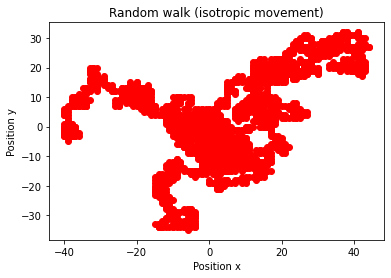

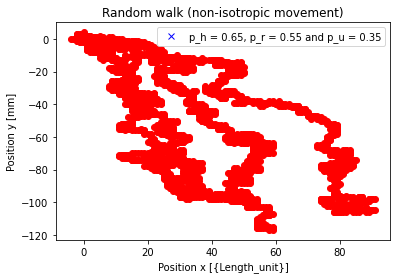

In [78]:


#Defining the function to equate the random walk in two dimensions
def Multiple_Random_Walk_2D(M, N, p_h, pr, pu):
    #Defining the variables and lists necessary for the function
    x_pos = []
    y_pos = []        
    time_step_arr_two_d = np.linspace(1,M,M)
    for i in range(N):
        x = 0
        t = 0
        y = 0
        #Creates temporary lists for the x-, y- coordinates
        temp_list_x = np.zeros(M)
        temp_list_y = np.zeros(M)
        random = np.random.uniform(0, 1, M)
        random2 = np.random.uniform(0, 1, M)
        for j in range(M):

                
                #If..Move horizontally.
                if random[j] < p_h:
                    if random2[j] < pr:
                        x += 1
                    else:
                        x -= 1
                #Else..Move vertically.
                else:
                    if random2[j] < pu:
                        y+=1
                    else:
                        y-=1
                    
                
                #Adds x and y-values into their respective tmporary lists
                temp_list_x[j] = x
                temp_list_y[j] = y
        #Adds the temporary lists into the final lists
        x_pos.append(temp_list_x)
        y_pos.append(temp_list_y)
        #x_pos = np.transpose(x_pos)
        #y_pos = np.transpose(y_pos)
    return x_pos, y_pos, time_step_arr_two_d
v = Multiple_Random_Walk_2D(1000, 4,0.5,0.5,0.5)

#Test codes
#print(np.size(v[0]))
#print(v[0])
#print(v[2])
#print(matrix.reshape(10,10))
plt.figure(1)
plt.plot(v[0],v[1], 'ro')
plt.title("Random walk (isotropic movement)")
plt.ylabel('Position y')
plt.xlabel('Position x')

#We test the function for non-isotropic movement
g = Multiple_Random_Walk_2D(1000, 4,0.65,0.55,0.35)
plt.figure(2)
plt.plot(0,0,'bx',label = "p_h = 0.65, p_r = 0.55 and p_u = 0.35") #Adds label for reading porbabilities in plot
plt.plot(g[0],g[1], 'ro')
plt.title("Random walk (non-isotropic movement)")
plt.ylabel(f'Position y [{Length_unit}]')
plt.xlabel('Position x [{Length_unit}]')
plt.legend()

%timeit -n 100 Multiple_Random_Walk_2D(1000, 1, 0.5, 0.5, 0.5)

Here we see that in the non-isotropic random walk the particles tend to move in the direction with the highest probability, which in this case is right and down. Whilst with the isotropic random walk the particles tend to spread more out in all directions. For these values it's quite clear in most simulations that figure 2 is non-isotropic but even for lower values there is visible tendency to favor the direction with the highest probability.


## Exercise 1h

In this exercise we write a function that calculates the ratios to have returned to origo as a function of time n(t) with N random walkers and M time steps.

Text(0.5, 0, 'Time [s]')

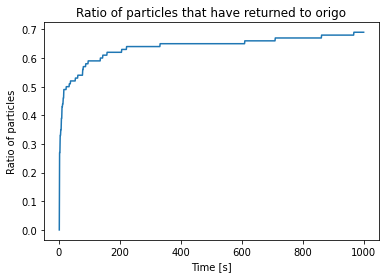

In [79]:

def n(array, N, M):
    origo = 0
    net = []
    
    if len(array) == 2: #Checks if array is for 1 dimension
        ones = np.linspace(1,1,len(array[0])) #Creates an array of only ones
        matrix = np.transpose(array[0]) #Returns the transpose 
        time = array[1] #Pulls out the time array from the function
        #Runs through the entire array and checks if a particle has returned to origo
        #If the particle has returned to origo it's array is replaced by the ones array, this ensures it's not read again
        #For each time step the ratio of particles that's been to origo cumulatively is stored in the net array
        for i in range(0,M):
            for j in range(0,N):
                if matrix[j][i] == 0:
                    origo += 1/N
                    matrix[j] = ones
            net = np.append(net,origo)


    else:
        ones = np.linspace(1,1,len(array[0][0]))
        time = array[2]
        x_pos = array[0]
        y_pos = array[1]
        #Does the same as the for loop above only by viewing both positional arrays
        #Only the x_pos array is replaced by the ones array
        for i in range(0,M):
            for j in range(0,N):
                if x_pos[j][i] == 0 and y_pos[j][i] == 0:
                    origo += 1/N
                    x_pos[j] = ones
                    
            net = np.append(net,origo)
            
    return net, time

M = 1000
N = 100
i = Multiple_Random_Walk_2D(M,N,0.5,0.5,0.5)

origo = n(i, N, M)
#print(origo)
plt.figure(1)
plt.plot(origo[1],origo[0])
plt.title("Ratio of particles that have returned to origo")
plt.ylabel('Ratio of particles')
plt.xlabel(f'Time [{Time_unit}]')

The probability of a particle returning to origo after n moves will always be 0 when n is odd as the particle will always have to reverse each step in order to reach origo if we assume cardinal movement, something that it can't have done after an odd number of moves.

If we look at the probability of a particle returning to origo in 1 dimension we find that there are
$\begin{pmatrix} 2n \\ n \end{pmatrix}$ moves in which the particle has moved to a point and back to origo after 2n moves if we assume isotropic movement. Meaning that in total the probability is

$p_1(2n) = \begin{pmatrix} 2n \\ n \end{pmatrix}\bigg/2^{2n} = \frac{2n!}{n!(2n-n)!}\bigg/2^{2n} $

as the probability of an event is the amount of wanted/expected events divided by the total amount of possible events, which in this case is $2^{2n}$

For movement in two dimensions we see that there are twice as many directions the object can move, giving us the total amount of events $4^{2n} = \left(2^{2n}\right)^2$ and essentially the same for the operator. Meaning we get the equation

$p_2(2n) = \bigg(\begin{pmatrix} 2n \\ n \end{pmatrix}\bigg)^{2}\bigg/(2^{2n})^2 = \bigg(\frac{2n!}{n!(2n-n)!}\bigg/2^{2n}\bigg)^2 = \bigg(\frac{2n!}{n!n!}\bigg/2^{2n}\bigg)^2$

Going by this we find that when we try to find the number of particles in origo at $t = 1$ we find it to be zero as no particle could have returned to their starting point after one move. Whilst at $t = 2$ we find $p_1(2) = \frac{1}{2}$ and $p_2(2) = \frac{1}{4}$

Meaning that in one dimension $P(x=0,t=2) = \frac{N}{2}$, and in two dimensions $P(x=0,t=2) = \frac{N}{4}$ and for both we get $P(x=0,t=1) = 0$

## Exercise 1i

In this exercise we implement the function from the previous exercise in one and two dimensions with the variables N, M in an isotropic system. 

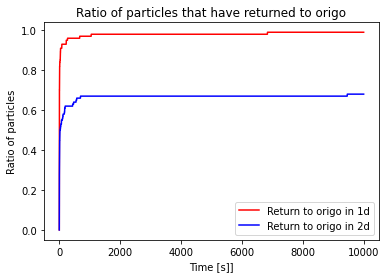

In [81]:
M, N = 10000, 100

Random_walk_1d = Multiple_Random_Walk_1D_optimized(M,N,0.5)

Random_walk_2d = Multiple_Random_Walk_2D(M,N,0.5,0.5,0.5)

origo_1d = n(Random_walk_1d, N, M)

origo_2d = n(Random_walk_2d, N, M)


plt.figure(1)
plt.plot(origo_1d[1],origo_1d[0],"r", label = "Return to origo in 1d")
plt.plot(origo_2d[1],origo_2d[0],"b", label = "Return to origo in 2d")
plt.title("Ratio of particles that have returned to origo")
plt.ylabel('Ratio of particles')
plt.xlabel(f'Time [{Time_unit}]]')
plt.legend()

#This test code runs through the n() function repeatedly to check what mean percantage has returned to origo
#Should not be taken out of comments as it increases runtime significantly
#origo_counter = []
#for i in range(0,100):
#    origo = n(Multiple_Random_Walk_2D(M,N,0.5,0.5,0.5), N, M)
#    origo_counter.append(origo[0][-1])
#print(np.mean(origo_counter))


For a simulation in ode dimension: any M value over 1000 we can assume that $n_1(M) \approx P(x=0, t\to\infty) = 1$ fits as we see it almost reaches 1 before tapering off. However for 2d we can't really say the same as it seems to stop rising around 0.7. We ran a test code for several values of M and N giving the table beneath. And going by this it would seem that we'd need an extremely high value for M in order to reach $n_2(M) \approx P(x=0, t\to\infty) = 1$. However the limit seems to work as when tested for M = 1 000 000 we do get a total value of around 0.85, meaning that it probably converges at 1.


Mean values of origo returners with 100 iterations (2d):

M = 1000, N = 100, mean = 0.667

M = 1000, N = 250, mean = 0.677

M = 1000, N = 500, mean = 0.679

M = 2000, N = 250, mean = 0.70

M = 4000, N = 250, mean = 0.72

Going by this table it would seem that N does not affect $n(t)$ that much, and it seems that the time has the largest effect on the final ratio. Increasing the amount of particles would just make the graph smoother seeming as for the analytical formula n(t) the only variable is time and an increase in particle amount would only give a larger sample size and in turn lower variance and uncertainty. 


## Exercise 2a) 

By the given paremeters $\Delta x = 0.004mm$ and $\Delta t = 0.01s$, the formula for the diffusion constant
$D = \frac{{(\Delta x)}^2}{2\cdot\Delta t}$ gives $D = 0.0008 \frac{(mm)^2}{s}$ for healthy tissue. 

## Exercise 2b)

In this exercise we implement a Random Walk simulation in 2D with tumors centered at randomly chosen coordinates. Every tumor has a reduction coefficient $t_{k} < 1$ that reduces the diffusion constant. This coefficient reduces $\Delta x$ with $\sqrt{t_{k}}$ inside the tumor. If two or more tumors overlap in a determined area, the diffusion constant reduces with the square root of the product of the tumor coefficients involved in that area. We will assume for the rest of the project that all tumors have the same reduction coefficient $t_{k}$.


In [7]:
#Function for calculating the effective delta_x value for a given position (x,y)
def effective_delta_X(x,y,tumor_center,t_k,t_a):
    deltax = 0.004
    #Take distance from circles to every(x,y)
    conditioned_d = [(x2,y2) for x2,y2 in tumor_center if math.dist((x, y), [x2, y2]) <= t_a]
    #Calculate effective delta_x based on numbers of tumors in range of (x,y), as deltax_eff = deltax*(t_k)^(number_of_tumors_in_range/2)
    deltax*= ((math.sqrt(t_k))**len(conditioned_d))
    return deltax

In [8]:
#Function for randomly generating tumors in the quadrant LxL
L = 0.02
def create_tumors(N, L):
    centerx = []
    centery= []
    for i in range(N):
        random_center_x= np.random.uniform(0,L+0.00001)
        centerx.append(random_center_x)
        random_center_y= np.random.uniform(0,L+0.00001)
        centery.append(random_center_y)

    #MAKE CENTERX AND CENTERY INTO ONE ARRAY WITH TUPLES(X,Y)
    Matr_tumors = np.array((centerx,centery)).T
    return Matr_tumors


In [9]:
# Function that calculates effective_delta_x for quadrants in a grid of 1000x1000. 
def tumor_visualizer(t_c,L,t_a):
    #Using a resolution of 1000x1000 gives a nice sharpness and scaeling when used with pcolormesh
    resolution = 1000
    r = t_a
    t_k = 0.1
    grid = np.zeros((resolution,resolution))
    x = np.arange(0,L,L/resolution)
    y = np.arange(0,L,L/resolution)
    count = 0;
    # Iterate over every y in the grid.
    for j in y:
        grid2 = np.full(resolution,0.004)
        for i in t_c:
            #Using np.where to either multiply every delta_x value by sqrt(t_k) or do nothing, based on the distance from a tumours
            #centrum to the centrum of every quadrant in the 1000 by 1000 grid. This ensures a nice scaeling that shows the tumours circular shape.
            #np.where also allows us to calculate all 1000 values in the firs grid row fast, and enables us to only iterate over 1000 elements insted of 
            #one million, greatly imporving the code runtime. 
            grid2 = np.where((((x+(0.5*L/resolution))-i[0])*((x+(0.5*L/resolution))-i[0]))+(((j+(0.5*L/resolution))-i[1])*((j+(0.5*L/resolution))-i[1])) < pow(r,2),grid2*sqrt(t_k),grid2)  
        grid[count] = grid2
        count += 1
    return grid

## Exercise 2c)

In this exercise we implement a 2D random walk with parameters $L = 0.02$, $M = 1000$, $N = 2$ and fifteen tumours. $L$ specifies the domain width and height, $M$ is the number of timesteps amd $N$ is the number of molecules.

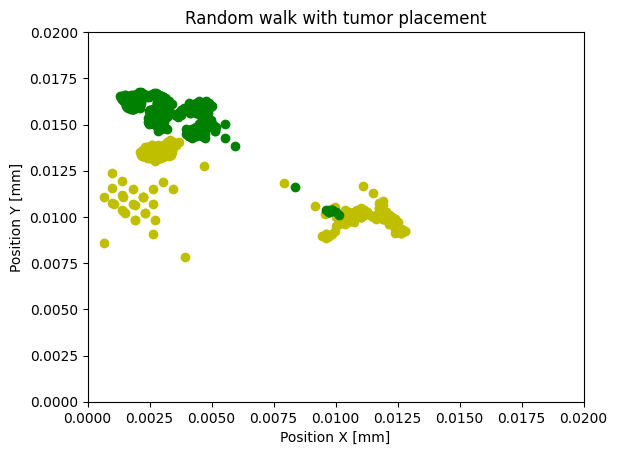

In [11]:
#Random walk with effective delta_x 2D

x_min, x_max = 0, 0.02
y_min, y_max = 0, 0.02
t_k= 0.1
M=1000
N = 2
t_a = 0.003
L = 0.02
#Deltax is for both directions, i.e. dx=dy
deltax = 0.004
    # initial position of the particle
#x = 0

P = np.array([0.01, 0.005])
x_1 = P[0]
y_1 = P[1]


def walk_with_tumors(M,N,L, Matr_tumors, x_0, y_0, t_k,t_a):
    coord_x = []
    coord_y = []
    time= []
    p_h = 0.5
    pr = 0.5
    pu = 0.5
    for i in range(N):
        t = 0
        x_1 = x_0
        y_1 = y_0
        while t < M:
            #increase time until we reach M
 
            deltax = effective_delta_X(x_1,y_1,Matr_tumors,t_k,t_a)
            #Do random walk with the (non)updated value of delta_x   
            random1 = np.random.uniform(0,1)
            random2 = np.random.uniform(0,1)

            #DO RANDOM WALK IN 2D: DECIDE X OR Y AND RIGHT OR LEFT OR UP OR DOWN

            
            if random1 < pr:
                x_1 += deltax
            else:
                x_1 -= deltax

            #Move in y direction: up or down 
           
            if random2 < pu:
                y_1 += deltax
            else:
                y_1 -= deltax
            #Append to array
            coord_x.append(x_1)
            coord_y.append(y_1)
            time.append(t)
            t+= 1
    return coord_x, coord_y, time
    
    
    
#print(conditioned_d)
#print(coord_x)
#print(coord_y)
Matr_tumors = create_tumors(15, 0.02)

coord_x , coord_y, time = walk_with_tumors(M,N,L, Matr_tumors, 0.01, 0.01,t_k,t_a)

plt.plot(coord_x[0:999], coord_y[0:999], 'yo')
plt.plot(coord_x[1000:2000], coord_y[1000:2000], 'go')

#plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.title("Random walk with tumor placement")
plt.ylabel('Position Y ' + '[' + Length_unit + ']')
plt.xlabel('Position X ' + '[' + Length_unit + ']')
plt.xlim(0,L)
plt.ylim(0,L)
#plt.plot(Matr_tumors.T[0],Matr_tumors.T[1],"bo")
plt.show()
    

The figure above shows a randomwalk simulation with the parameters as specified in the introduction to exercise 2c. We can clearly see clusters of points showing the effect of overlapping tumours. 

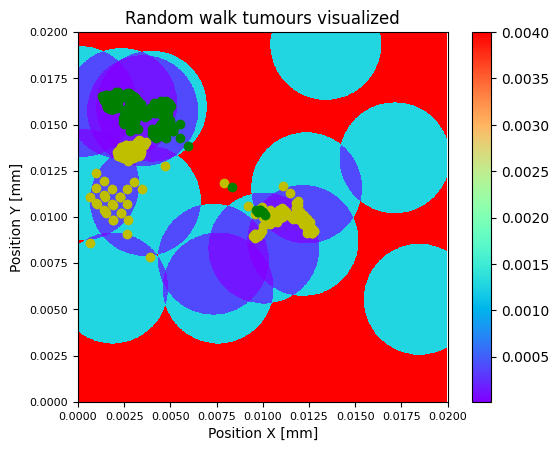

In [12]:


visualizer_data = tumor_visualizer(Matr_tumors,0.02, t_a)
xy = np.arange(0,0.02,0.02/1000)
X, Y = np.meshgrid(xy,xy)

fig, ax = plt.subplots()

c = ax.pcolormesh(X,Y,visualizer_data,cmap = 'rainbow')


plt.title("Tumor placement and size")
ax.set_aspect('equal')
ax.plot(coord_x[0:999], coord_y[0:999], 'yo')
ax.plot(coord_x[1000:2000], coord_y[1000:2000], 'go')
plt.title("Random walk tumours visualized")
plt.ylabel('Position Y ' + '[' + Length_unit + ']')
plt.xlabel('Position X ' + '[' + Length_unit + ']')
plt.xlim(0,L)
plt.ylim(0,L)
plt.tick_params(axis='x',which='major',labelsize = 8)
plt.tick_params(axis='y',which='major',labelsize = 8)
plt.colorbar(c)
plt.show()


The figure above shows the randomwalk from figure 1 with a color coded background that represents the tumours. Different colors corresponds to 
different effective $\Delta x$ values. This shows even clearer the effect of the overlapping tumors, as we see that all the clusters are created in areas with much overlap.

## Exercise 2d

In order to effectivly simulate randomwalks in 2D with tumours, we need to chose a boundary condition for our molecules as we are limited to a finite domain when simulating. 

We have chosen to use periodic boundary conditions. The reason for this choice is that it gives the most accurate simulations with little trade off, compared to the other two. By using periodic boundary conditions, we avoid the problem of molecules disappearing out in infinity. This can be a problem mainly when we have few timesteps and molecules. Running simulations with a large number of timesteps and molecules can make it hard to analyze the results, as our figures get saturated with too many datapoints. Molecules may end up never entering some of the tumours, and then become undetectable when looking at the intensity plots in exercise 2e). Another advantage with the periodic boundary condition is that it eliminates the possibility of creating false tumours. This can become a problem when using hard walls as molecules can end up being stuck along the edges and create clusters. This may lead us to falsely believe that there is a tumour in a spot without one. 

One drawback of our chosen boundary condition is that if a molecule ends up right at the edge of our defined area, and there is a tumour in this area extending partially outside our domain, the movement of the molecule will be inaccurate if it then leaves the allowed area. Our code will then intervene and move the molecule in a predictable manner. This reduces the molecules random behaviour, and so removes some precision from our simulation. By the topology of the periodic boundary condition, the molecule exists on both the horizontal or vertical edges at the same time. This removes the possibility to simulate diffusion between two sides of our area. However, most of the time molecules will never bunch up on the edges, and this drawback is therefore less important when trying to detect tumours.  

In [50]:
t_k = 0.1

def walk_with_tumors(M,N,L, Matr_tumors, x_0, y_0, t_k,t_a):
    coord_x = []
    coord_y = []
    time= []
    p_h = 0.5
    pr = 0.5
    pu = 0.5
    for i in range(N):
        t = 0
        x_1 = x_0
        y_1 = y_0
        while t < M:
            #increase time until we reach M
 
            deltax = 0.004
            #Take distance from circles to every(x,y). CONSIDER REPLACING THE LINE UNDER WITH NP.WHERE()
            conditioned_d = [(x2,y2) for x2,y2 in Matr_tumors if math.dist((x_1, y_1), [x2, y2]) <= t_a]

            #print(conditioned_d)
            #Calculate effective delta_x
            deltax*= ((math.sqrt(t_k))**len(conditioned_d))
            #Do random walk with the (non)updated value of delta_x   
            random1 = np.random.uniform(0,1)
            random2 = np.random.uniform(0,1)

            #DO RANDOM WALK IN 2D: DECIDE X OR Y AND RIGHT OR LEFT OR UP OR DOWN

            
            if random1 < pr:
                x_1 += deltax
                if x_1 > L:
                    x_1 -= L
            else:
                x_1 -= deltax
                if x_1<0:
                    x_1+= L

            #Move in y direction: up or down 
           
            if random2 < pu:
                y_1 += deltax
                if y_1 > L:
                    y_1 -= L
            else:
                y_1 -= deltax
                if y_1<0:
                    y_1+=L
            #Append to array
            coord_x.append(x_1)
            coord_y.append(y_1)
            time.append(t)
            t+= 1
    return coord_x, coord_y, time



    

## Exercise 2e

Cartesian coordinates yielded by a random walk can be used to detect the position of the tumors as the simulated molecules tend to spend more time in areas where the diffusion constant is lower. Thus, one can define a squared area of length LxL with coordinates ($x_{min}$, $x_{min}$) $\times$ ($y_{min}$, $y_{max}$) with $n_x$ rows and $n_y$ colummns. Then we can introduce the normalized Intensity I (i,j) of each grid as $I(i,j) = \frac{\text{Number of times a walker is in point} (i,j)}{MN}$. High values for I would then correspond to grids with a low value of the diffusion constant D.

In [13]:
n_x= 40
n_y = 40

def Intensity(coord_x,coord_y, x_min, x_max, y_min, y_max, n_x, n_y):
    #Calculate Intensity with np.histogram2d
    H, xedges, yedges = np.histogram2d(coord_x,coord_y, bins=n_x,range=[[x_min,x_max],[y_min,y_max]],  density=True)
    H = H.T
    
    return xedges, yedges, H

## Exercise 2f

Text(0, 0.5, 'Position Y [mm]')

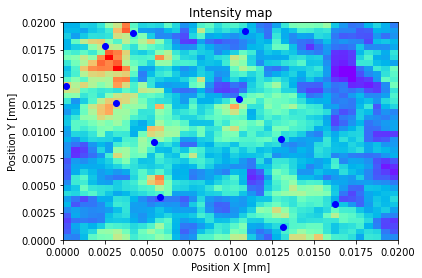

In [136]:
t_k = np.random.uniform(0.3,0.45)
n_x, n_y = 40, 40
N, M = 1000, 10000


Matr_tumors = create_tumors(11,L)

coord_x , coord_y, time = walk_with_tumors(M,N,L, Matr_tumors, 0.01, 0.01,t_k,t_a)

Intensity_pict = Intensity(coord_x,coord_y, x_min, x_max, y_min, y_max, n_x, n_y)
#Plot Intensity map
plt.pcolormesh(Intensity_pict[0], Intensity_pict[1], Intensity_pict[2], cmap='rainbow')

#Plot location of tumors
plt.plot(Matr_tumors.T[0],Matr_tumors.T[1], 'bo')

#Labeling axes
plt.title("Intensity map")
plt.xlabel("Position X [mm]")
plt.ylabel("Position Y [mm]")

The figure above describes the Intensity map as a function of the xy coordinates and the position of the center of the tumors. One can see the areas with high signals correspond to those highlighted by coloured pixeles (other than blue) and that these are located in the vecinity of the tumors and specially in their overlapping areas where the effective displacement of the molecules is even lower due to a higher density of tumurous material and thus lower difussion constant. Bigger tumorous areas would imply that molecules would spend more time in the coordinates spanned by such areas and thus generate higher intensity signals within the tumor boundaries which can be also used to detect the size of the tumors.

## Exercise 2g

In order to detect the exact position of the tumors, one can use edge detection which is a image analysis technique. In this project a Sobel filter is implemented (which is one of the simplest techniques for edge detection) to detect the position of the tumors based upon what the Intensity map yielded. What this filter does, basically, is to performs a 2-D spatial gradient measurement on an image and so emphasizes regions of high spatial frequency that correspond to edges.
In the cell below we perform an implementation of the Sobel filter on the Intensity map.

C:\Users\ben\AppData\Local\Temp/ipykernel_19660/2980236576.py:39: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax.pcolormesh(X,Y,visualizer_data,cmap = 'rainbow')


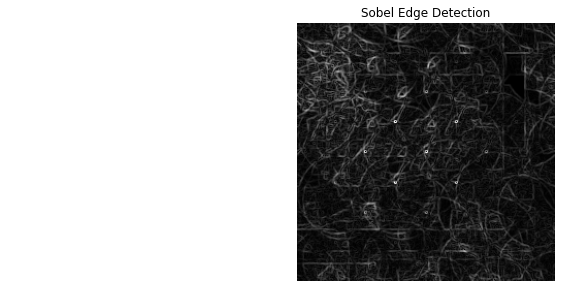

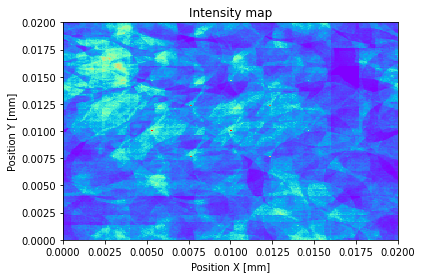

<Figure size 432x288 with 0 Axes>

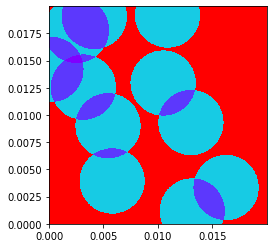

In [137]:
from skimage import filters

n_x = 250

Intensity_pict = Intensity(coord_x,coord_y, x_min, x_max, y_min, y_max, n_x, n_y)

edge_sobel = filters.sobel(Intensity_pict[2])
edge_sobel2 = np.flipud(edge_sobel)

fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(8, 4))


#axes[0].imshow(y)
#axes[0].set_title('Original Image')

axes[1].imshow(edge_sobel2, cmap=plt.cm.gray)
axes[1].set_title('Sobel Edge Detection')


for ax in axes:
    ax.axis('off')

plt.tight_layout()

plt.figure(2)
plt.pcolormesh(Intensity_pict[0], Intensity_pict[1], Intensity_pict[2], cmap='rainbow')

plt.title("Intensity map")
plt.xlabel("Position X [mm]")
plt.ylabel("Position Y [mm]")

plt.figure(3)
visualizer_data = tumor_visualizer(Matr_tumors,0.02, t_a)
xy = np.arange(0,0.02,0.02/1000)
X, Y = np.meshgrid(xy,xy)

fig, ax = plt.subplots()

c = ax.pcolormesh(X,Y,visualizer_data,cmap = 'rainbow')
ax.set_aspect('equal')


plt.show()


From the figure above we can see that after the Sobel filtered was applied, it is easier to separate (or locate) individual tumors for higher resolution values. However, if the resolution value is too high the edges appear dimmer and thus it becomes harder to distinguish between tumors.